# Laboratorium 9 - Faktoryzacja QR


##### Aleksandra Mazur

## Zadanie 1 Faktoryzacja QR metodą Grama-Schmidta

Do wykonania zadań użyto następujących bibliotek:
* numpy
* matplotlib
* time
* scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg

**Faktoryzacja QR** to w algebrze liniowej rozkład macierzy **A** do postaci iloczynu dwóch macierzy **A = QR**, gdzie **Q** jest macierzą ortogonalną$(Q^{T}Q=I)$ i **R** jest macierzą trójkątną górną.

### 1. Napisz funkcję dokonujaca faktoryzacji QR macierzy $A \in R^{n×n}$, $A = [a_1, a_2, . . . , a_n]$ ($a_i$ to kolejne kolumny macierzy A) klasyczną metodą ortogonalizacji Grama-Schmidta.

Poniżej została zaimplementowana funkcja ***gram_schmidt_QR***, która jako argument przyjmuje macierz *A*. Funkcja ta korzystając z metody Grama-Schmidta dokonuje faktoryzacji QR macierzy *A*. Kolejne kroki odpowiadają tym, które zostały przedstawione w poleceniu zadania. Funkcja ta zwraca macierz ortogonalną *Q* i macierz trójkątną górną *R*.

In [2]:
def gram_schmidt_QR(A):
    n = A.shape[0] # size of matrix A
    
    A = np.array(A)
    Q = np.zeros(A.shape)
    R = np.zeros(A.shape)
    
    Q[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0]) # step (1) u1 = a1 / || a1 || 

    for k in range(1, n):
        Q[:, k] = A[:, k] # step (2) uk = ak

        for i in range(k):
            Q[:, k] -= np.inner(Q[:, i], A[:, k]) * Q[:, i] # step(2) uk -= suma (od i = 1 do i = k - 1) z <ui, ak> ui
    
        Q[:, k] = Q[:, k] / np.linalg.norm(Q[:, k]) # step (3) uk = uk \ || uk ||

    for i in range(n):
        for j in range(i, n):
            R[i, j] = np.inner(Q[:, i], A[:, j])

    return Q, R

Poniżej przedstawiono przykład działania funckji ***gram_schmidt_QR*** dla losowej macierzy.

In [3]:
A = np.random.rand(4,4)
print("A:")
print(A)
Q, R = gram_schmidt_QR(A)
print("Q:")
print(Q)
print("R:")
print(R)
print("QR:")
print(np.matmul(Q,R))

A:
[[0.38004971 0.70671437 0.20901851 0.76028404]
 [0.66490691 0.30378181 0.88242214 0.36691096]
 [0.46333884 0.38192734 0.12673449 0.01730884]
 [0.44783895 0.03450061 0.40823685 0.18744403]]
Q:
[[ 0.37971162  0.83104211  0.13855709  0.38208642]
 [ 0.6643154  -0.24876404  0.61602475 -0.34251279]
 [ 0.46292665  0.13744957 -0.72045776 -0.49774205]
 [ 0.44744055 -0.47811409 -0.28680316  0.69924804]]
R:
[[ 1.0008904   0.66239591  0.90690387  0.62431606]
 [ 0.          0.54773993 -0.2235759   0.45331326]
 [ 0.          0.          0.3641644   0.26513915]
 [ 0.          0.          0.          0.28727704]]
QR:
[[0.38004971 0.70671437 0.20901851 0.76028404]
 [0.66490691 0.30378181 0.88242214 0.36691096]
 [0.46333884 0.38192734 0.12673449 0.01730884]
 [0.44783895 0.03450061 0.40823685 0.18744403]]


Jak widać powyżej *R* jest macierzą trójkątną górną, a równanie *A = QR* jest spełnione.

### 2. Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze.

Funkcja pomocniczna ***exec_QR*** przyjmuje funkcję *qr_function* i macierz *A*, następnie dokonuje faktoryzacji danej macierzy, używając przyjętej funkcji i mierzy czas działania. Funkcja zwraca macierz *Q*, macierz *R* i czas działania.

In [4]:
def exec_QR(qr_function, A):
    start = time.time()
    Q, R = qr_function(A)
    end = time.time()
    return Q, R, end - start

Funkcja ***test_gram_schmidt_QR*** tworzy losową macierz o rozmiarze *n* przekazanym jako jej parametr. Następnie dokonuje faktoryzacji QR zaimplementowaną przeze mnie funkcją, a także funkcją biblioteczną ***numpy.linalg.qr***. Wypisuje osiągnięte rezultaty, sprawdza poprawność wyników i zwraca czasy działania obu funkcji.

In [5]:
def test_gram_schmidt_QR(n):
    print("Matrix ", n, " x ", n)
    A = np.random.rand(n, n) # generate random matrix n x n
    
    my_Q, my_R, my_time = exec_QR(gram_schmidt_QR, A)
    lib_Q, lib_R, lib_time = exec_QR(np.linalg.qr, A)
    
    print("My time: " + str(my_time))
    print("Lib time: " + str(lib_time))
    print("Time difference: ", abs(my_time - lib_time))
    
    print("A = QR => ", np.allclose(my_Q.dot(my_R), A))
    
    print("Lib Q = my Q => ", np.allclose(np.abs(my_Q), np.abs(lib_Q)))
    print("Lib R = my R => ", np.allclose(np.abs(my_R), np.abs(lib_R)))
    print("")

    return my_time, lib_time

Funkcja ***test*** wywołuje funkcję ***test_gram_schmidt_QR*** dla różnych rozmiarów macierzy oraz tworzy wykres zależności czasu działania zaimplementowanej funkcji i funkcji bibliotecznej w zależności od rozmiaru macierzy.

Matrix  50  x  50
My time: 0.02891826629638672
Lib time: 0.0029916763305664062
Time difference:  0.025926589965820312
A = QR =>  True
Lib Q = my Q =>  True
Lib R = my R =>  True

Matrix  100  x  100
My time: 0.05584573745727539
Lib time: 0.000997304916381836
Time difference:  0.054848432540893555
A = QR =>  True
Lib Q = my Q =>  True
Lib R = my R =>  True

Matrix  200  x  200
My time: 0.27526164054870605
Lib time: 0.001996278762817383
Time difference:  0.27326536178588867
A = QR =>  True
Lib Q = my Q =>  True
Lib R = my R =>  True

Matrix  350  x  350
My time: 0.7550113201141357
Lib time: 0.006949186325073242
Time difference:  0.7480621337890625
A = QR =>  True
Lib Q = my Q =>  True
Lib R = my R =>  True

Matrix  500  x  500
My time: 1.8436648845672607
Lib time: 0.01692509651184082
Time difference:  1.82673978805542
A = QR =>  True
Lib Q = my Q =>  True
Lib R = my R =>  True



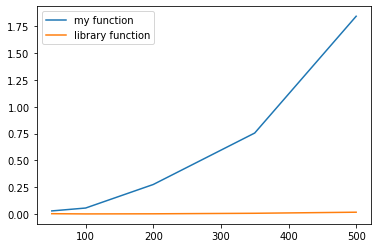

In [6]:
def test():
    my_times = []
    lib_times = []
    sizes = [50, 100, 200, 350, 500]
    for n in sizes:
        my_time, lib_time = test_gram_schmidt_QR(n)
        my_times.append(my_time)
        lib_times.append(lib_time)
    
    plt.plot(sizes, my_times, label='my function')
    plt.plot(sizes, lib_times, label='library function')
    plt.legend()
    plt.show()

test()

Jak widać powyżej zaimplementowana funkcja działa poprawnie, zwracając wyniki zgodne z wynikami funkcji bibliotecznej. Czas działania obu funkcji rośnie wraz ze zwiększaniem rozmiaru macierzy, jednak w przypadku funkcji bibliotecznej jest to prawie niezauważalna różnica. Zaimplementowana funkcja jest stosunkowo wolniejsza od funkcji bibliotecznej.

### 3. Wygeneruj 30-50 przykładowych macierzy 8 × 8 o różnym wskaźniku uwarunkowania $cond(A_i)$ (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizujacą dekompozycję QR (potrzebne bedą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

Funkcja ***generate_matrices*** generuje 50 macierzy 8 x 8 o różnym wskaźniku uwarunkowania $cond(A_i)$ używając SVD.

In [7]:
def generate_matrices():
    conds = []
    matrices = []
    cond = 0
    while cond < 50:
        A = np.random.rand(8, 8)
        U, S, VH = scipy.linalg.svd(A)
        S[0] = S[-1] * np.random.randint(low=1e8, high=1e9)
        if S[0] / S[-1] not in conds:
            conds.append(S[0]/S[-1])
            A = U @ np.diag(S) @ VH
            matrices.append(A)
            cond += 1
    return matrices, conds

In [8]:
matrices, conds = generate_matrices()

### 4. Dla każdej z uzyskanych w ten sposób macierzy $A_i$ wyznacz faktoryzację QR korzystając z zaimplementowanej funkcji $(A_i = Q_iR_i)$. Przedstaw zależność $||I−Q_i^TQ_i||$ od $cond(A_i)$.

In [9]:
def factorization_matrices(matrices, conds):
    I_QTQ = []
    I = np.identity(8)
    for matrix in matrices: 
        Q, R = gram_schmidt_QR(matrix)
        I_QTQ.append(np.linalg.norm(abs(I - Q.T @ Q)))

    plt.scatter(conds, I_QTQ)
    plt.xlabel("conds")
    plt.ylabel("I - Q^TQ")

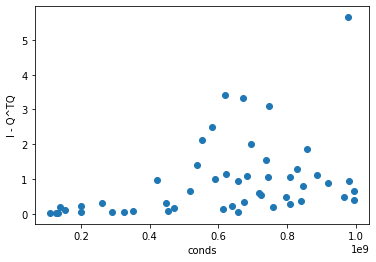

In [10]:
factorization_matrices(matrices, conds)

### 5. Zinterpretuj wyniki. Jaka jest przyczyna uzyskanych rozbieżnosci? Od czego zalezy wielkość rozbieżności?

Można zauważyć, że im wyższy jest wskaźnik uwarunkowania macierzy, tym większa staje się rozbieżność. 
Rozbieżność jest spowodowana niedokładnościami w obliczeniach numerycznych (zaokrągleniami do postaci zmiennopozycyjnej), co mogło wpłynąć na utratę ortogonalności macierzy *Q*.

## Zadanie 2 - rozwiązywanie układów równań metodą QR

### Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR korzystając z własności macierzy ortogonalnych: $A^T = A^{−1}$, a także z mechanizmu back substitution. Następnie wykorzystaj ją do rozwiązania problemu aproksymacji średniokwadratowej dla zbioru punktów podanego tabeli poniżej. Przyjmij model postaci: $$ f(x) = \alpha_0 + \alpha_1x + \alpha_2x^2 $$ Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca f).
| x | -5 | -4 | -3 | -2| -1| 0| 1| 2| 3| 4| 5|
| --|----|----|----|----|----|----|----|----|----|----|----|
|y  | 2  | 7 | 9| 12 | 13 | 14 | 14 | 13 | 10| 8| 4|

Funkcja ***solve_QR*** rozwiązuje układ równań w postaci $$Ax=B$$ korzystając z następujących przekształceń:
$$ A^TAx = A^T B$$
następnie obliczamy Q i R, takie że $$ A^TA = QR $$
i podstawiamy do wcześniejszego równania
$$ QRx = A^TB $$
mnożymy przez macierz $Q^T$
$$ Q^TQRx = Q^TA^TB$$
a ponieważ $Q^TQ = I$, co wynika z ortogonalności macierzy Q, to mamy do rozwiązania:
$$ Rx = Q^TA^TB$$

In [11]:
def solve_QR(A, B):
    B = A.T @ B
    A = A.T @ A
    Q, R = gram_schmidt_QR(A)
    return scipy.linalg.solve_triangular(R, Q.T @ B)

Funkcja ***find_approximation*** korzystając z powyższej funkcji ***solve_QR***, znajduje funkcję aproksymującą przechodzącą w pobliżu punktów znajdujących się w tabeli i przedstawia wizualizację tych punktów oraz znalezionej funkcji aproksymującej.

In [12]:
def find_approximation():
    X = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
    Y = np.array([2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4])
    plt.scatter(X,Y)

    A = np.array([[1, x_i, x_i**2] for x_i in X])
    B = Y

    print("A:")
    print(A)
    print("B: ")
    print(B)

    x = [a_0, a_1, a_2] = solve_QR(A, B)

    result = [a_0 + a_1 * x_i + a_2 * x_i**2 for x_i in X]
    plt.plot(X, result)
    plt.show()

A:
[[ 1 -5 25]
 [ 1 -4 16]
 [ 1 -3  9]
 [ 1 -2  4]
 [ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]
 [ 1  2  4]
 [ 1  3  9]
 [ 1  4 16]
 [ 1  5 25]]
B: 
[ 2  7  9 12 13 14 14 13 10  8  4]


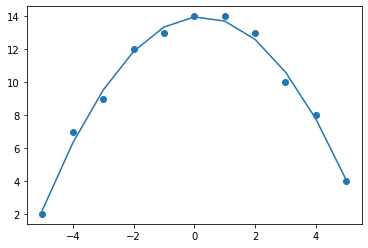

In [13]:
find_approximation()

## Wnioski:
* Jak widać aproksymacja funkcji wykorzystująca metodę QR działa zadowalająco. Funkcja aproksymująca przechodzi przez zadane punkty lub jest w ich pobliżu.
* Zastosowanie metody QR pozwala na rozwiązanie układu równań w szybkim czasie. R jest macierzą trójkątną górną, co umożlwia użycie *back substitution*.
* Na bazie rozkładu QR możliwa jest realizacja metody najmniejszych kwadratów oraz różnych metod rozwiązywania układów równań liniowych. Oprócz metody Grama-Schmidta istnieje transformacja Householdera, pozwalająca na znalezienie rozkładu QR dowolnej macierzy prostokątnej.